In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
all_data=pd.read_csv("/content/sample_data/Mortality_09_UP.csv",nrows=25175)
all_data.head()

<ipython-input-181-2555622b1fba>:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("/content/sample_data/Mortality_09_UP.csv",nrows=25175)


,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN


In [ ]:
print(list(all_data.columns),end='e')

['id', 'm_id', 'client_m_id', 'hl_id', 'house_no', 'house_hold_no', 'state', 'district', 'rural', 'stratum_code', 'psu_id', 'm_serial_no', 'deceased_sex', 'date_of_death', 'month_of_death', 'year_of_death', 'age_of_death_below_one_month', 'age_of_death_below_eleven_month', 'age_of_death_above_one_year', 'treatment_source', 'place_of_death', 'is_death_reg', 'is_death_certificate_received', 'serial_num_of_infant_mother', 'order_of_birth', 'death_symptoms', 'is_death_associated_with_pregnan', 'death_period', 'months_of_pregnancy', 'factors_contributing_death', 'factors_contributing_death_2', 'symptoms_of_death', 'time_between_onset_of_complicati', 'nearest_medical_facility', 'm_expall_status', 'field38', 'hh_id', 'client_hh_id', 'currently_dead_or_out_migrated', 'hh_serial_no', 'sex', 'usual_residance', 'relation_to_head', 'member_identity', 'father_serial_no', 'mother_serial_no', 'date_of_birth', 'month_of_birth', 'year_of_birth', 'age', 'religion', 'social_group_code', 'marital_status',

In [ ]:
all_data.shape

(25175, 122)

In [ ]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [ ]:
death.isnull().sum()

age                       115
sex                       115
highest_qualification     167
rural                       0
disability_status         166
is_water_filter          1777
chew                     1626
smoke                    1626
alcohol                  1626
treatment_source         1284
dtype: int64

In [ ]:
for i in death.columns:
  death[i] = pd.to_numeric(death[i],errors='coerce')

In [ ]:
for column in columns:
    death[column].fillna(death[column].mode().iloc[0], inplace=True)


In [ ]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [ ]:
death.head()

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0


In [ ]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [ ]:
l = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]

In [ ]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25175 entries, 0 to 25174
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    25175 non-null  float64
 1   sex                    25175 non-null  float64
 2   highest_qualification  25175 non-null  float64
 3   rural                  25175 non-null  int64  
 4   disability_status      25175 non-null  float64
 5   is_water_filter        25175 non-null  float64
 6   chew                   25175 non-null  float64
 7   smoke                  25175 non-null  float64
 8   alcohol                25175 non-null  float64
 9   treatment_source       25175 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.9 MB


In [ ]:
X = death.drop('age',axis=1)
y = death['age']

In [ ]:
for i in X.columns:
  print(i, X[i].unique())
  print("\n")

sex [1. 2.]


highest_qualification [4. 0. 3. 2. 5. 7. 8. 6. 1. 9.]


rural [1 2]


disability_status [0. 7. 5. 6. 1. 3. 2. 4.]


is_water_filter [2. 1.]


chew [7. 5. 1. 0. 3. 6. 2. 4.]


smoke [4. 1. 0. 2. 3.]


alcohol [4. 1. 2. 0. 3.]


treatment_source [ 0.  9.  8.  6. 12.  2.  4. 99.  3. 10.  5.  1. 70. 65. 11.  7. 60.]




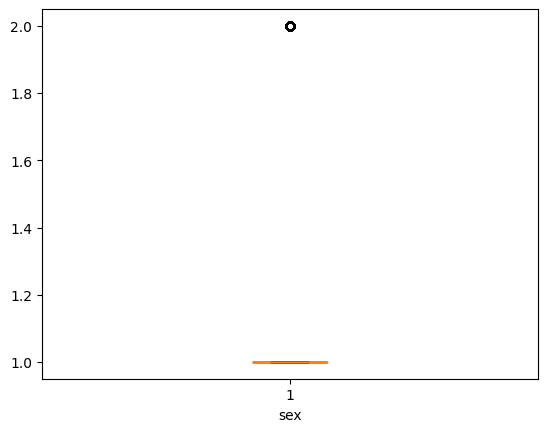

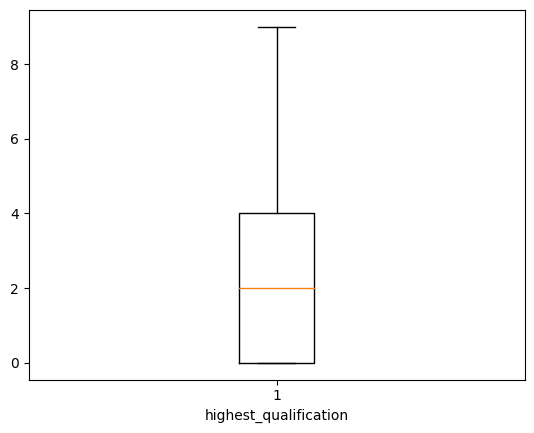

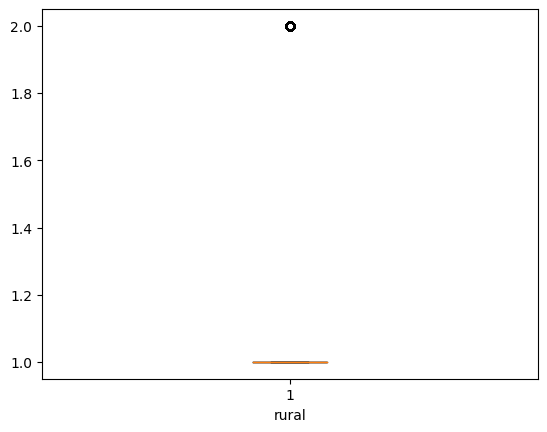

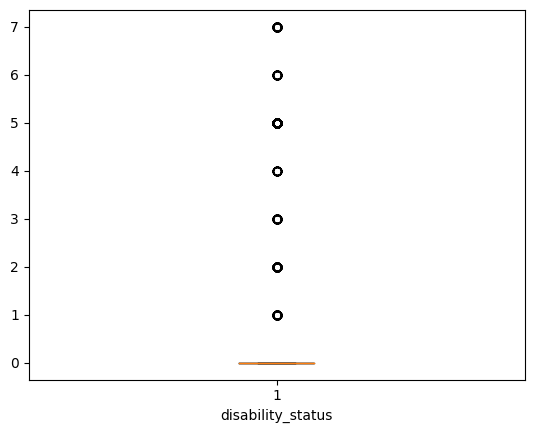

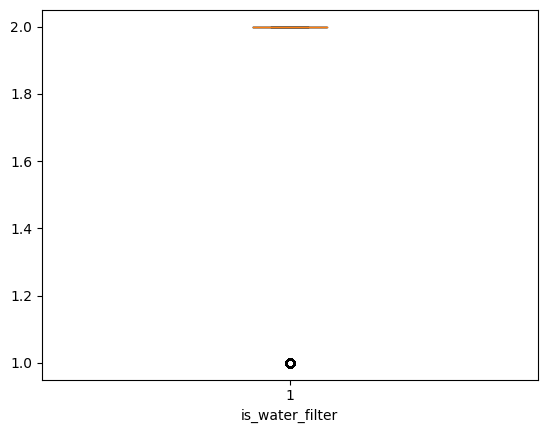

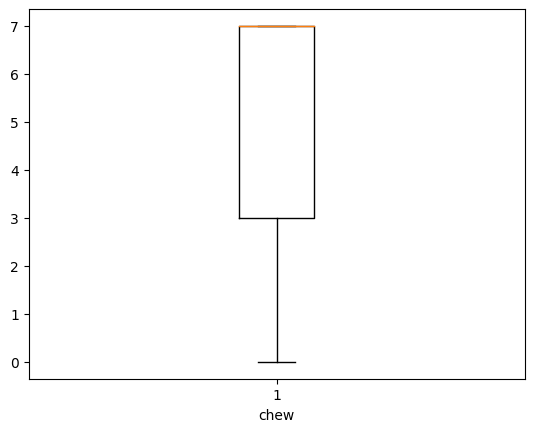

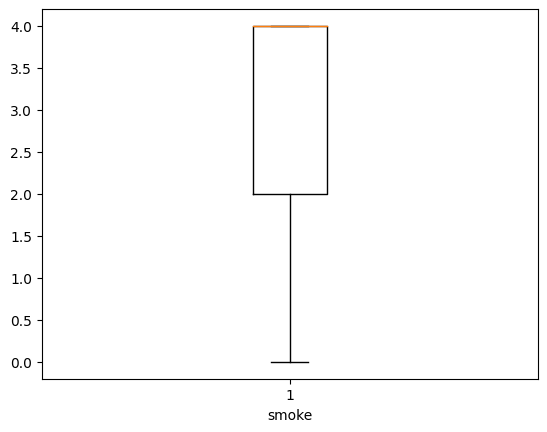

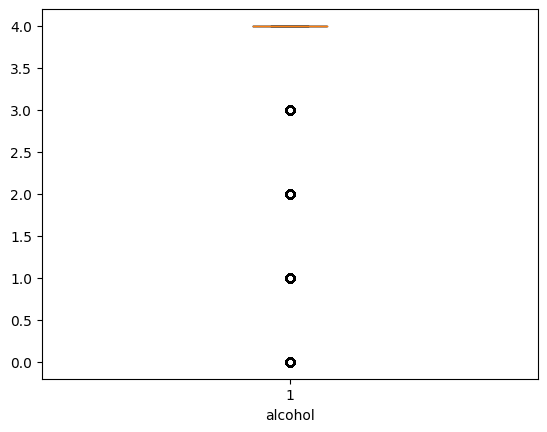

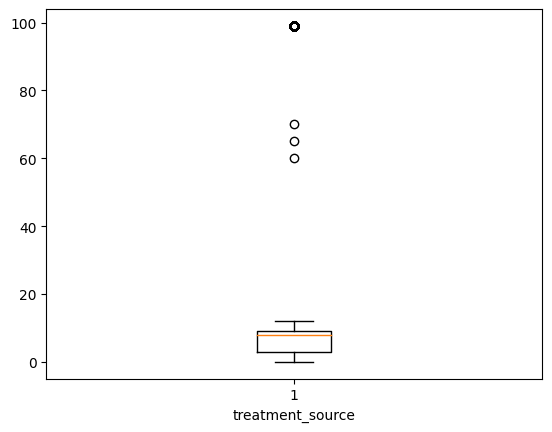

In [ ]:
for feature in X.columns:
    data = X.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [ ]:
for feature in X.columns:
    IQR= X[feature].quantile(0.75) - X[feature].quantile(0.25)
    
    lower_bridge = X[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = X[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = X[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = X[feature].quantile(0.75)+(IQR*3)
    
    
    X.loc[X[feature]<=lower_bridge,feature] = lower_bridge
    X.loc[X[feature]>=upper_bridge,feature] = upper_bridge
    
    

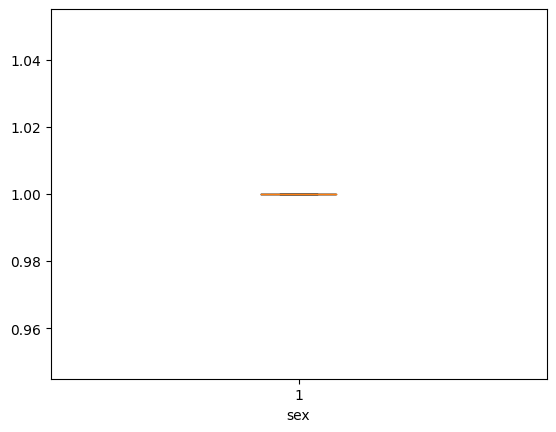

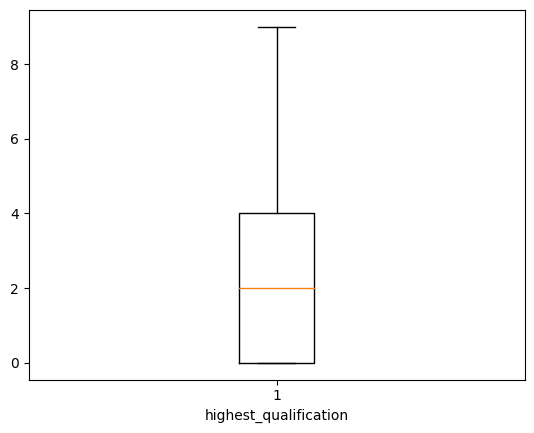

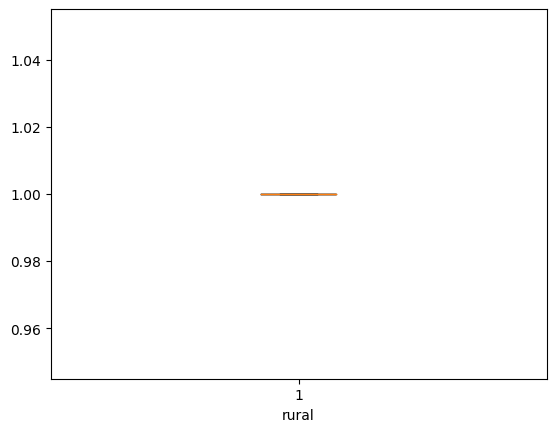

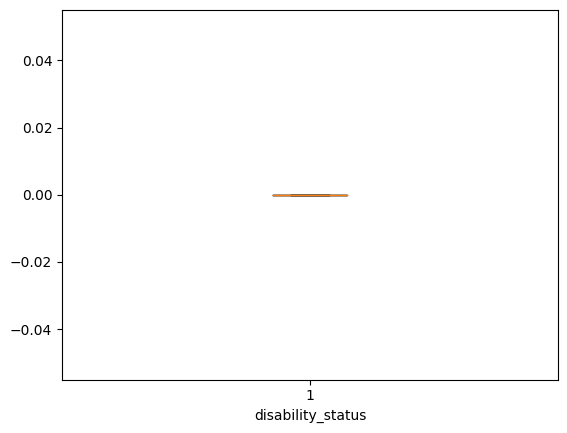

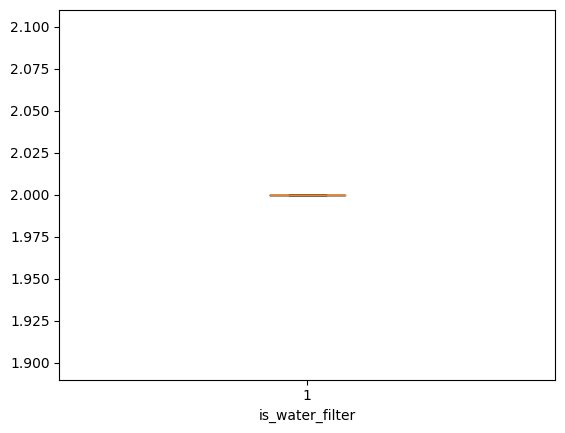

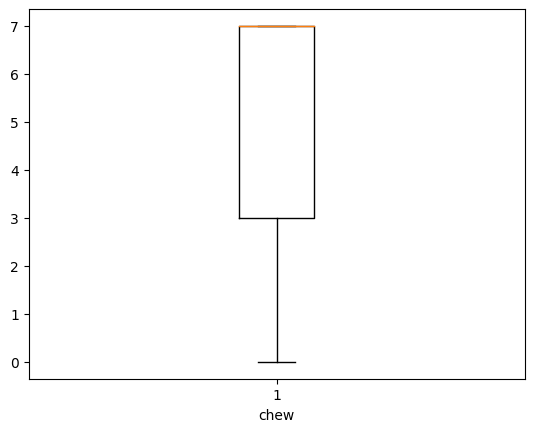

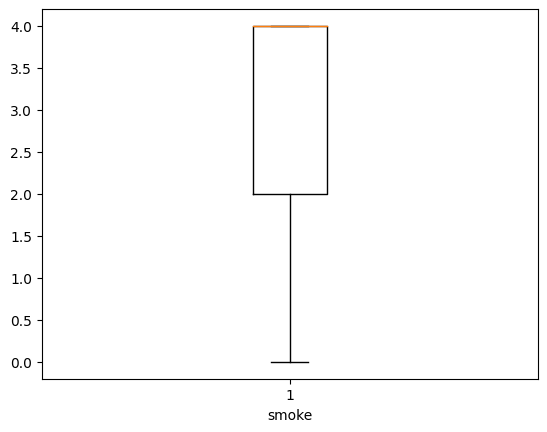

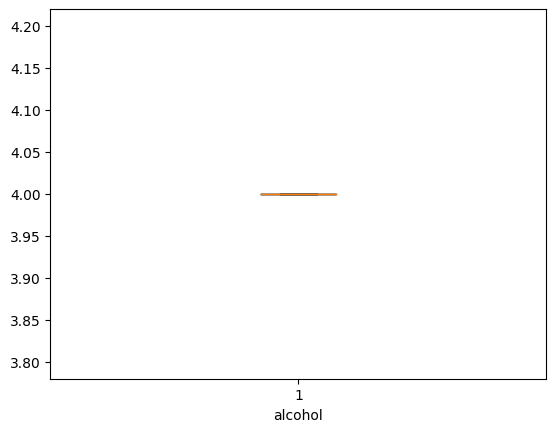

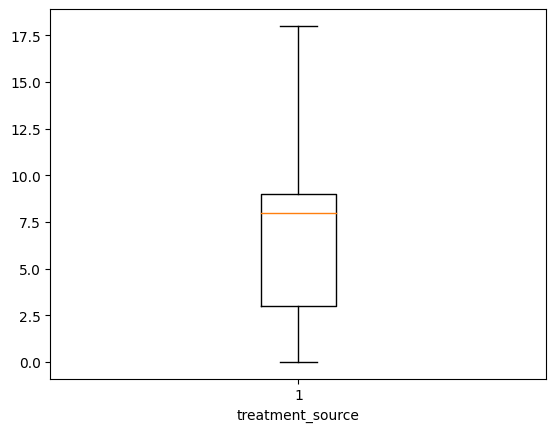

In [ ]:
for feature in X.columns:
    data = X.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [ ]:
len(list(X.columns))

9

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42,shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
### Creating ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
reg = Sequential()

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
bias=tensorflow.keras.initializers.HeNormal()

In [ ]:
# Adding the first hidden layer
reg.add(Dense(units= 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 9))
#reg.add(Dropout(0.3))

# Adding the second hidden layer
reg.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu',use_bias=True,bias_initializer=bias))
#reg.add(Dropout(0.5))

# Adding the third hidden layer
reg.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu'))
reg.add(Dropout(0.3))

# Adding the output layer
reg.add(Dense(1,kernel_initializer="he_normal"))


In [ ]:
reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the ANN
reg.compile(optimizer = opt,loss=MeanSquaredError(),metrics=RootMeanSquaredError())

In [ ]:
learning=reg.fit(X_train,y_train,epochs=30,batch_size=32,verbose=1)

Epoch 1/30
614/614 [==============================] - 11s 4ms/step - loss: 418.3388 - root_mean_squared_error: 20.4533
Epoch 2/30
614/614 [==============================] - 2s 3ms/step - loss: 359.3832 - root_mean_squared_error: 18.9574
Epoch 3/30
614/614 [==============================] - 2s 3ms/step - loss: 338.7497 - root_mean_squared_error: 18.4052
Epoch 4/30
614/614 [==============================] - 2s 3ms/step - loss: 315.1592 - root_mean_squared_error: 17.7527
Epoch 5/30
614/614 [==============================] - 2s 3ms/step - loss: 295.9488 - root_mean_squared_error: 17.2032
Epoch 6/30
614/614 [==============================] - 3s 5ms/step - loss: 276.4825 - root_mean_squared_error: 16.6278
Epoch 7/30
614/614 [==============================] - 2s 4ms/step - loss: 266.9357 - root_mean_squared_error: 16.3382
Epoch 8/30
614/614 [==============================] - 2s 3ms/step - loss: 252.9470 - root_mean_squared_error: 15.9043
Epoch 9/30
614/614 [==============================] - 2

In [ ]:
reg.weights

[<tf.Variable 'dense/kernel:0' shape=(9, 10) dtype=float32, numpy=
 array([[-0.42205867, -0.11598896,  1.0028511 , -0.59827024, -0.01791003,
          0.42125824,  0.64846843,  0.16953018,  0.06108323, -0.12632239],
        [ 1.2961538 , -0.2666749 ,  0.07717639, -0.22310404, -0.30321983,
         -0.2502579 , -4.8823924 , -0.12840763,  2.270069  ,  0.6772874 ],
        [-1.5237007 , -0.5885168 ,  1.3030206 , -0.01442585,  0.08770096,
          1.2748373 , -0.21643056,  0.8807083 ,  0.13943432, -1.344709  ],
        [-0.17458835,  1.0445666 , -0.5614272 , -0.04010043, -0.49452138,
         -0.25784656,  0.13752596, -0.24309233,  0.17385454, -0.32306013],
        [-1.6418581 , -0.30008322,  1.5094637 , -0.19330156, -0.92092127,
          1.1207584 ,  0.1540469 ,  1.1554065 , -0.61957633, -0.84801245],
        [ 1.2963798 , -0.6090317 , -2.472511  ,  0.48137763,  0.20252466,
         -0.99802434, -1.1299684 ,  0.77465606, -0.85119003,  0.08056909],
        [ 0.16909552, -0.08827108, -0.0

In [ ]:
import joblib

joblib.dump(reg,"/content/sample_data/reg.pkl")

['/content/sample_data/reg.pkl']

In [ ]:
#loading
p_model=joblib.load("/content/sample_data/reg.pkl")

In [ ]:
p_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

reg.save('drive/MyDrive/h5 files/reg.h5')